In [2]:
# 导包
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter

%matplotlib inline  # 有了%matplotlib inline 就可以省掉plt.show()了

UsageError: unrecognized arguments: # 有了%matplotlib inline 就可以省掉plt.show()了


In [3]:
# 载入数据
Train_data = pd.read_csv('./used_car_train_20200313.csv', sep=' ')
Test_data = pd.read_csv('./used_car_testA_20200313.csv', sep=' ')

In [4]:
Train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [5]:
Train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')

In [6]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

In [7]:
# 删除异常值
# 这里我包装了一个异常值处理的代码，可以随便调用。
def outliers_proc(data, col_name, scale=3):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """

    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))  # 算的是位距
        val_low = data_ser.quantile(0.25) - iqr  #上下限，这个范围是可以调的
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)

    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print("Now column number is: {}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n

Delete number is: 963
Now column number is: 149037
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: power, dtype: float64
Description of data larger than the upper bound is:
count      963.000000
mean       846.836968
std       1929.418081
min        376.000000
25%        400.000000
50%        436.000000
75%        514.000000
max      19312.000000
Name: power, dtype: float64


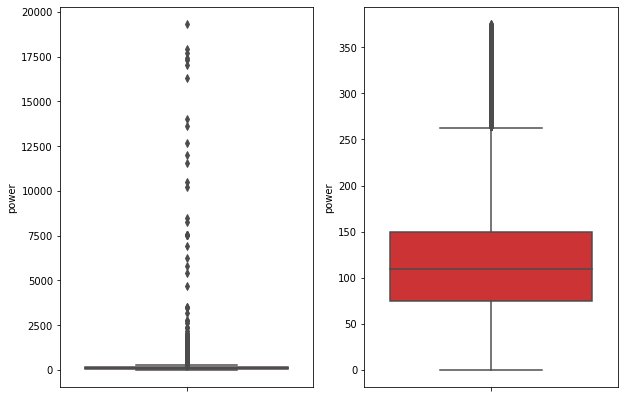

In [8]:
# 我们可以删掉一些异常数据，以 power 为例。  
# 这里删不删同学可以自行判断
# 但是要注意 test 的数据不能删 = = 不能掩耳盗铃是不是

Train_data = outliers_proc(Train_data, 'power', scale=3)

Delete number is: 10005
Now column number is: 139032
Description of data less than the lower bound is:
count    10005.000000
mean         2.435632
std          1.268291
min          0.500000
25%          1.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: kilometer, dtype: float64
Description of data larger than the upper bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: kilometer, dtype: float64


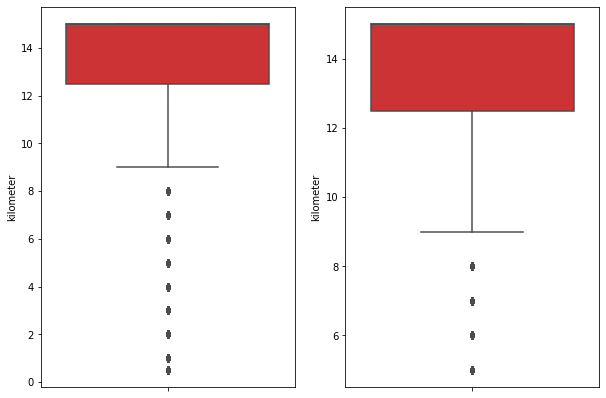

In [9]:
Train_data = outliers_proc(Train_data, 'kilometer', scale=3)

In [10]:
'''
3.3.2 特征构造
'''
# 训练集和测试集放在一起，方便构造特征
Train_data['train']=1
Test_data['train']=0
data = pd.concat([Train_data, Test_data], ignore_index=True)



C:\Users\Richman\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [11]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth",1000)
pd.set_option('display.width',1000)
data.head()

,SaleID,bodyType,brand,creatDate,fuelType,gearbox,kilometer,model,name,notRepairedDamage,offerType,power,price,regDate,regionCode,seller,train,v_0,v_1,v_10,v_11,v_12,v_13,v_14,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9
0,0,1.0,6,20160404,0.0,0.0,12.5,30.0,736,0.0,0,60,1850.0,20040402,1046,0,1,43.357796,3.966344,-2.881803,2.804097,-2.420821,0.795292,0.914762,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462
1,1,2.0,1,20160309,0.0,0.0,15.0,40.0,2262,-,0,0,3600.0,20030301,4366,0,1,45.305273,5.236112,-4.900482,2.096338,-1.030483,-1.722674,0.245522,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582
2,2,1.0,15,20160402,0.0,0.0,12.5,115.0,14874,0.0,0,163,6222.0,20040403,2806,0,1,45.978359,4.823792,-4.846749,1.803559,1.565330,-0.832687,-0.229963,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075
3,3,0.0,10,20160312,0.0,1.0,15.0,109.0,71865,0.0,0,193,2400.0,19960908,434,0,1,45.687478,4.492574,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000
4,4,1.0,5,20160313,0.0,0.0,5.0,110.0,111080,0.0,0,68,5200.0,20120103,6977,0,1,44.383511,2.031433,-1.896240,0.910783,0.931110,2.834518,1.923482,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534


In [12]:
# 使用时间：data['creatDate'] - data['regDate']，反应汽车使用时间，一般来说价格与使用时间成反比
# 不过要注意，数据里有时间出错的格式，所以我们需要 errors='coerce'
data['used_time'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') - 
                            pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt.days

#新创建了一列为used_time

In [13]:
data.head()

,SaleID,bodyType,brand,creatDate,fuelType,gearbox,kilometer,model,name,notRepairedDamage,offerType,power,price,regDate,regionCode,seller,train,v_0,v_1,v_10,v_11,v_12,v_13,v_14,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,used_time
0,0,1.0,6,20160404,0.0,0.0,12.5,30.0,736,0.0,0,60,1850.0,20040402,1046,0,1,43.357796,3.966344,-2.881803,2.804097,-2.420821,0.795292,0.914762,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,4385.0
1,1,2.0,1,20160309,0.0,0.0,15.0,40.0,2262,-,0,0,3600.0,20030301,4366,0,1,45.305273,5.236112,-4.900482,2.096338,-1.030483,-1.722674,0.245522,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,4757.0
2,2,1.0,15,20160402,0.0,0.0,12.5,115.0,14874,0.0,0,163,6222.0,20040403,2806,0,1,45.978359,4.823792,-4.846749,1.803559,1.565330,-0.832687,-0.229963,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,4382.0
3,3,0.0,10,20160312,0.0,1.0,15.0,109.0,71865,0.0,0,193,2400.0,19960908,434,0,1,45.687478,4.492574,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,7125.0
4,4,1.0,5,20160313,0.0,0.0,5.0,110.0,111080,0.0,0,68,5200.0,20120103,6977,0,1,44.383511,2.031433,-1.896240,0.910783,0.931110,2.834518,1.923482,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,1531.0


In [14]:
# 看一下空数据，有 15k 个样本的时间是有问题的，我们可以选择删除，也可以选择放着。
# 但是这里不建议删除，因为删除缺失数据占总样本量过大，7.5%
# 我们可以先放着，因为如果我们 XGBoost 之类的决策树，其本身就能处理缺失值，所以可以不用管；
data['used_time'].isnull().sum()

14180

In [17]:
# 从邮编中提取城市信息，相当于加入了先验知识
data['city'] = data['regionCode'].apply(lambda x : str(x)[:-3])
#data['regionCode']
data=data

In [31]:
# 计算某品牌的销售统计量，同学们还可以计算其他特征的统计量
# 这里要以 train 的数据计算统计量
Train_gb = Train_data.groupby("brand")
all_info = {}
for kind, kind_data in Train_gb:
    info = {}
    kind_data = kind_data[kind_data['price'] > 0]
    info['brand_amount'] = len(kind_data)
    info['brand_price_max'] = kind_data.price.max()
    info['brand_price_median'] = kind_data.price.median()
    info['brand_price_min'] = kind_data.price.min()
    info['brand_price_sum'] = kind_data.price.sum()
    info['brand_price_std'] = kind_data.price.std()
    info['brand_price_average'] = round(kind_data.price.sum() / (len(kind_data) + 1), 2) # round 四舍五入，2为指定的位数
    all_info[kind] = info
brand_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={"index": "brand"})
data = data.merge(brand_fe, how='left', on='brand')
all_info

{0: {'brand_amount': 29400,
  'brand_price_max': 63000,
  'brand_price_median': 2990.0,
  'brand_price_min': 15,
  'brand_price_sum': 144300715,
  'brand_price_std': 5280.362650734477,
  'brand_price_average': 4908.02},
 1: {'brand_amount': 12717,
  'brand_price_max': 84000,
  'brand_price_median': 5800.0,
  'brand_price_min': 15,
  'brand_price_sum': 101886454,
  'brand_price_std': 7525.610136896947,
  'brand_price_average': 8011.2},
 2: {'brand_amount': 285,
  'brand_price_max': 42500,
  'brand_price_median': 7000.0,
  'brand_price_min': 200,
  'brand_price_sum': 2915474,
  'brand_price_std': 8576.522554381907,
  'brand_price_average': 10193.97},
 3: {'brand_amount': 2193,
  'brand_price_max': 27000,
  'brand_price_median': 4400.0,
  'brand_price_min': 70,
  'brand_price_sum': 12642442,
  'brand_price_std': 4663.014616626928,
  'brand_price_average': 5762.28},
 4: {'brand_amount': 15841,
  'brand_price_max': 99999,
  'brand_price_median': 5900.0,
  'brand_price_min': 30,
  'brand_pri

In [20]:
# 数据分桶 以 power 为例
# 这时候我们的缺失值也进桶了，
# 为什么要做数据分桶呢，原因有很多，= =
# 1. 离散后稀疏向量内积乘法运算速度更快，计算结果也方便存储，容易扩展；
# 2. 离散后的特征对异常值更具鲁棒性，如 age>30 为 1 否则为 0，对于年龄为 200 的也不会对模型造成很大的干扰；
# 3. LR 属于广义线性模型，表达能力有限，经过离散化后，每个变量有单独的权重，这相当于引入了非线性，能够提升模型的表达能力，加大拟合；
# 4. 离散后特征可以进行特征交叉，提升表达能力，由 M+N 个变量编程 M*N 个变量，进一步引入非线形，提升了表达能力；
# 5. 特征离散后模型更稳定，如用户年龄区间，不会因为用户年龄长了一岁就变化

# 当然还有很多原因，LightGBM 在改进 XGBoost 时就增加了数据分桶，增强了模型的泛化性

bin = [i*10 for i in range(31)]
data['power_bin'] = pd.cut(data['power'], bin, labels=False)
data[['power_bin', 'power']].head()

,power_bin,power
0,5.0,60
1,NaN,0
2,16.0,163
3,19.0,193
4,6.0,68


In [21]:
# 删除不需要的数据
data = data.drop(['creatDate', 'regDate', 'regionCode'], axis=1)

In [22]:
print(data.shape)
data.columns

(189032, 46)


Index(['SaleID', 'bodyType', 'brand', 'fuelType', 'gearbox', 'kilometer', 'model', 'name', 'notRepairedDamage', 'offerType', 'power', 'price', 'seller', 'train', 'v_0', 'v_1', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'used_time', 'city', 'brand_amount_x', 'brand_price_max_x', 'brand_price_median_x', 'brand_price_min_x', 'brand_price_sum_x', 'brand_price_std_x', 'brand_price_average_x', 'brand_amount_y', 'brand_price_max_y', 'brand_price_median_y', 'brand_price_min_y', 'brand_price_sum_y', 'brand_price_std_y', 'brand_price_average_y', 'power_bin'], dtype='object')

In [23]:
# 目前的数据其实已经可以给树模型使用了，所以我们导出一下
data.to_csv('data_for_tree.csv', index=0)

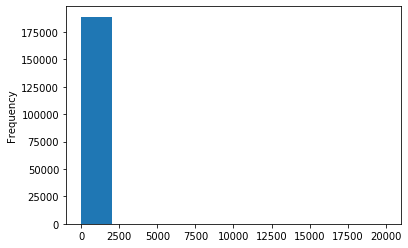

In [24]:
# 我们可以再构造一份特征给 LR NN 之类的模型用
# 之所以分开构造是因为，不同模型对数据集的要求不同
# 我们看下数据分布：
data['power'].plot.hist()

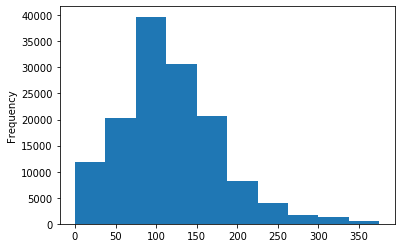

In [25]:
# 我们刚刚已经对 train 进行异常值处理了，但是现在还有这么奇怪的分布是因为 test 中的 power 异常值，
# 所以我们其实刚刚 train 中的 power 异常值不删为好，可以用长尾分布截断来代替
Train_data['power'].plot.hist()

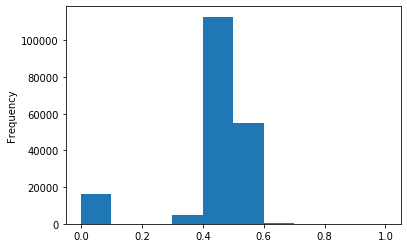

In [26]:
# 我们对其取 log，在做归一化
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data['power'] = np.log(data['power'] + 1) 
data['power'] = ((data['power'] - np.min(data['power'])) / (np.max(data['power']) - np.min(data['power'])))
data['power'].plot.hist()

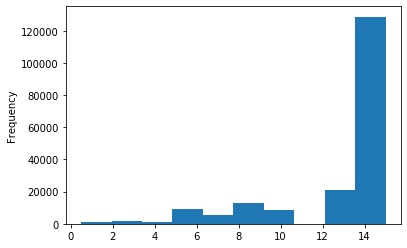

In [27]:
# km 的比较正常，应该是已经做过分桶了
data['kilometer'].plot.hist()

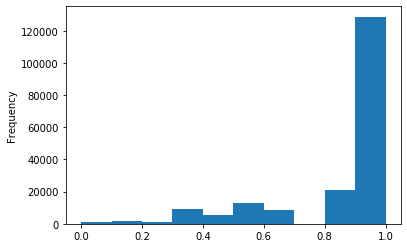

In [28]:
# 所以我们可以直接做归一化
data['kilometer'] = ((data['kilometer'] - np.min(data['kilometer'])) / 
                        (np.max(data['kilometer']) - np.min(data['kilometer'])))
data['kilometer'].plot.hist()

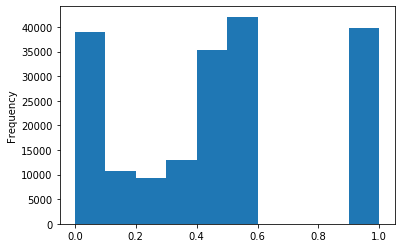

In [39]:
data['brand_amount'].plot.hist()

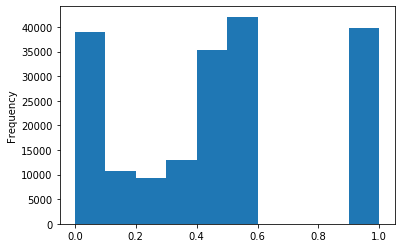

In [40]:
# 除此之外 还有我们刚刚构造的统计量特征：
# 'brand_amount', 'brand_price_average', 'brand_price_max',
# 'brand_price_median', 'brand_price_min', 'brand_price_std',
# 'brand_price_sum'
# 这里不再一一举例分析了，直接做变换，
# def max_min(x):
#      return (x - np.min(x)) / (np.max(x) - np.min(x))

#  归一化

data['brand_amount'] = ((data['brand_amount'] - np.min(data['brand_amount'])) / 
                        (np.max(data['brand_amount']) - np.min(data['brand_amount'])))
data['brand_price_average'] = ((data['brand_price_average'] - np.min(data['brand_price_average'])) / 
                               (np.max(data['brand_price_average']) - np.min(data['brand_price_average'])))
data['brand_price_max'] = ((data['brand_price_max'] - np.min(data['brand_price_max'])) / 
                           (np.max(data['brand_price_max']) - np.min(data['brand_price_max'])))
data['brand_price_median'] = ((data['brand_price_median'] - np.min(data['brand_price_median'])) /
                              (np.max(data['brand_price_median']) - np.min(data['brand_price_median'])))
data['brand_price_min'] = ((data['brand_price_min'] - np.min(data['brand_price_min'])) / 
                           (np.max(data['brand_price_min']) - np.min(data['brand_price_min'])))
data['brand_price_std'] = ((data['brand_price_std'] - np.min(data['brand_price_std'])) / 
                           (np.max(data['brand_price_std']) - np.min(data['brand_price_std'])))
data['brand_price_sum'] = ((data['brand_price_sum'] - np.min(data['brand_price_sum'])) / 
                           (np.max(data['brand_price_sum']) - np.min(data['brand_price_sum'])))

data['brand_amount'].plot.hist()

In [41]:
# 对类别特征进行 OneEncoder
data = pd.get_dummies(data, columns=['model', 'brand', 'bodyType', 'fuelType',
                                     'gearbox', 'notRepairedDamage', 'power_bin'])

In [42]:
print(data.shape)
data.columns

(189032, 384)


Index(['SaleID', 'kilometer', 'name', 'offerType', 'power', 'price', 'seller', 'train', 'v_0', 'v_1',
       ...
       'power_bin_20.0', 'power_bin_21.0', 'power_bin_22.0', 'power_bin_23.0', 'power_bin_24.0', 'power_bin_25.0', 'power_bin_26.0', 'power_bin_27.0', 'power_bin_28.0', 'power_bin_29.0'], dtype='object', length=384)

In [43]:
# 这份数据可以给 LR 用
data.to_csv('data_for_lr.csv', index=0)

In [44]:
'''
特征删选
'''
# 1）过滤式
# 相关性分析
print(data['power'].corr(data['price'], method='spearman'))
print(data['kilometer'].corr(data['price'], method='spearman'))
print(data['brand_amount'].corr(data['price'], method='spearman'))
print(data['brand_price_average'].corr(data['price'], method='spearman'))
print(data['brand_price_max'].corr(data['price'], method='spearman'))
print(data['brand_price_median'].corr(data['price'], method='spearman'))

0.5835897619996544
-0.3735768627868872
0.07066880738981655
0.3979426649435343
0.2530756448994376
0.40284666260625507


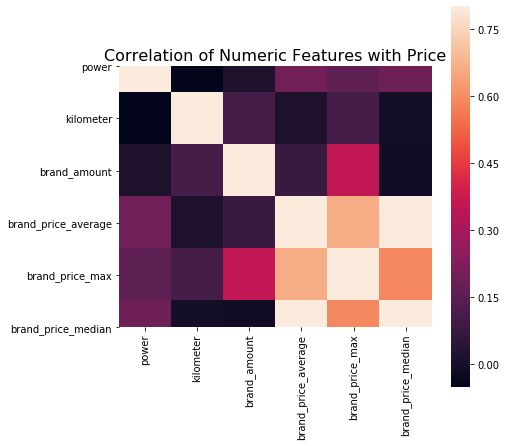

In [45]:
# 当然也可以直接看图
data_numeric = data[['power', 'kilometer', 'brand_amount', 'brand_price_average', 
                     'brand_price_max', 'brand_price_median']]
correlation = data_numeric.corr()

f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

In [81]:
data['price'].isnull().sum()
data.head()

,SaleID,kilometer,name,offerType,power,price,seller,train,v_0,v_1,v_10,v_11,v_12,v_13,v_14,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,used_time,city,brand_amount_x,brand_price_max_x,brand_price_median_x,brand_price_min_x,brand_price_sum_x,brand_price_std_x,brand_price_average_x,brand_amount_y,brand_price_max_y,brand_price_median_y,brand_price_min_y,brand_price_sum_y,brand_price_std_y,brand_price_average_y,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average,model_0.0,model_1.0,model_2.0,model_3.0,model_4.0,model_5.0,model_6.0,model_7.0,model_8.0,model_9.0,model_10.0,model_11.0,model_12.0,model_13.0,model_14.0,model_15.0,model_16.0,model_17.0,model_18.0,model_19.0,model_20.0,model_21.0,model_22.0,model_23.0,model_24.0,model_25.0,model_26.0,model_27.0,model_28.0,model_29.0,model_30.0,model_31.0,model_32.0,model_33.0,model_34.0,model_35.0,model_36.0,model_37.0,model_38.0,model_39.0,model_40.0,model_41.0,model_42.0,model_43.0,model_44.0,model_45.0,model_46.0,model_47.0,model_48.0,model_49.0,model_50.0,model_51.0,model_52.0,model_53.0,model_54.0,model_55.0,model_56.0,model_57.0,model_58.0,model_59.0,model_60.0,model_61.0,model_62.0,model_63.0,model_64.0,model_65.0,model_66.0,model_67.0,model_68.0,model_69.0,model_70.0,model_71.0,model_72.0,model_73.0,model_74.0,model_75.0,model_76.0,model_77.0,model_78.0,model_79.0,model_80.0,model_81.0,model_82.0,model_83.0,model_84.0,model_85.0,model_86.0,model_87.0,model_88.0,model_89.0,model_90.0,model_91.0,model_92.0,model_93.0,model_94.0,model_95.0,model_96.0,model_97.0,model_98.0,model_99.0,model_100.0,model_101.0,model_102.0,model_103.0,model_104.0,model_105.0,model_106.0,model_107.0,model_108.0,model_109.0,model_110.0,model_111.0,model_112.0,model_113.0,model_114.0,model_115.0,model_116.0,model_117.0,model_118.0,model_119.0,model_120.0,model_121.0,model_122.0,model_123.0,model_124.0,model_125.0,model_126.0,model_127.0,model_128.0,model_129.0,model_130.0,model_131.0,model_132.0,model_133.0,model_134.0,model_135.0,model_136.0,model_137.0,model_138.0,model_139.0,model_140.0,model_141.0,model_142.0,model_143.0,model_144.0,model_145.0,model_146.0,model_147.0,model_148.0,model_149.0,model_150.0,model_151.0,model_152.0,model_153.0,model_154.0,model_155.0,model_156.0,model_157.0,model_158.0,model_159.0,model_160.0,model_161.0,model_162.0,model_163.0,model_164.0,model_165.0,model_166.0,model_167.0,model_168.0,model_169.0,model_170.0,model_171.0,model_172.0,model_173.0,model_174.0,model_175.0,model_176.0,model_177.0,model_178.0,model_179.0,model_180.0,model_181.0,model_182.0,model_183.0,model_184.0,model_185.0,model_186.0,model_187.0,model_188.0,model_189.0,model_190.0,model_191.0,model_192.0,model_193.0,model_194.0,model_195.0,model_196.0,model_197.0,model_198.0,model_199.0,model_200.0,model_201.0,model_202.0,model_203.0,model_204.0,model_205.0,model_206.0,model_207.0,model_208.0,model_209.0,model_210.0,model_211.0,model_212.0,model_213.0,model_214.0,model_215.0,model_216.0,model_217.0,model_218.0,model_219.0,model_220.0,model_221.0,model_222.0,model_223.0,model_224.0,model_225.0,model_226.0,model_227.0,model_228.0,model_229.0,model_230.0,model_231.0,model_232.0,model_233.0,model_234.0,model_235.0,model_236.0,model_237.0,model_238.0,model_239.0,model_240.0,model_241.0,model_242.0,model_243.0,model_244.0,model_245.0,model_246.0,model_247.0,brand_0,brand_1,brand_2,brand_3,brand_4,brand_5,brand_6,brand_7,brand_8,brand_9,brand_10,brand_11,brand_12,brand_13,brand_14,brand_15,brand_16,brand_17,brand_18,brand_19,brand_20,brand_21,brand_22,brand_23,brand_24,brand_25,brand_26,brand_27,brand_28,brand_29,brand_30,brand_31,brand_32,brand_33,brand_34,brand_35,brand_36,brand_37,brand_38,brand_39,bodyType_0.0,bodyType_1.0,bodyType_2.0,bodyType_3.0,bodyType_4.0,bodyType_5.0,bodyType_6.0,bodyType_7.0,fuelType_0.0,fuelType_1.0,fuelType_2.0,fuelType_3.0,fuelType_4.0,fuelType_5.0,fuelType_6.0,gearbox_0.0,gearbox_1.0,notRepairedDamage_-,notRepairedDamage_0.0,notRepair

In [106]:
columns=['SaleID', 'kilometer', 'name', 'offerType', 'power', 'price', 'seller', 'train', 'v_0', 'v_1', 
         'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 
         'v_8', 'v_9', 'used_time', 'city', 'brand_amount_x', 'brand_price_max_x', 
         'brand_price_median_x', 'brand_price_min_x', 'brand_price_sum_x', 'brand_price_std_x', 
         'brand_price_average_x', 'brand_amount_y', 'brand_price_max_y', 'brand_price_median_y', 
         'brand_price_min_y', 'brand_price_sum_y', 'brand_price_std_y', 'brand_price_average_y']
for col in columns:
    data[col].replace('-',np.nan,inplace=True)
    #data[col] = data[col].astype(np.float32)
# data['SaleID'].value_counts()
# data['kilometer'].value_counts()
# data['name'].value_counts()
# data['offerType'].value_counts()
# data['power'].value_counts()
# data['price'].value_counts()
# data['seller'].value_counts()
# data['train'].value_counts()
# data['v_0'].value_counts()
# data['used_time'].value_counts()
# data['city'].value_counts()
data = data.dropna().replace('-', 0).reset_index(drop=True)
    #data[col] = data[col].astype(np.float32)

In [107]:
# k_feature 太大会很难跑，没服务器，所以提前 interrupt 了
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs = SFS(LinearRegression(),
           k_features=10,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
x = data.drop(['price'], axis=1)
data['price'].replace('-',np.nan,inplace=True)

x = x.fillna(0)
y = data['price']
y = y.fillna(0)
sfs.fit(x, y)
sfs.k_feature_names_ 

ValueError: could not convert string to float: 

In [52]:
# 画出来，可以看到边际效益
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.grid()
plt.show()

AttributeError: SequentialFeatureSelector has not been fitted, yet.